# Задание #1 Numpy
## Инструменты для выполнения задания

### Jupyter Notebook
  * [Three Things I Love About Jupyter Notebooks](http://blog.kaggle.com/2015/12/07/three-things-i-love-about-jupyter-notebooks/)
  * [Jupyter Notebook Users Manual](http://jupyter.cs.brynmawr.edu/hub/dblank/public/Jupyter%20Notebook%20Users%20Manual.ipynb)
  * [Продвинутые трюки с jupyter часть 1](http://blog.dominodatalab.com/lesser-known-ways-of-using-notebooks/)
  * [Продвинутые трюки с jupyter часть 2](http://blog.dominodatalab.com/interactive-dashboards-in-jupyter/)
  * [Галерея интересных ноутбуков](https://github.com/ipython/ipython/wiki/A-gallery-of-interesting-IPython-Notebooks)

### Библиотеки Python

  * [NumPy](http://www.numpy.org/)
    - [Tutorial Brief](http://nbviewer.jupyter.org/github/twistedhardware/mltutorial/blob/master/notebooks/IPython-Tutorial/4%20-%20Numpy%20Basics.ipynb)
    - [Scipy Lecture Notes](http://www.scipy-lectures.org/). 
  * [Matplotlib](http://matplotlib.org/index.html)
    - [pyplot](http://matplotlib.org/api/pyplot_api.html) — эмуляция функционала графопостроений в Matlab
    - [галерея примеров](http://matplotlib.org/gallery.html)
  * [skimage](http://scikit-image.org/)

## Разминка
1. Создайте список (list) и массив (ndarray), содержащие числа от 0 до 100 000 000.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage import io
from skimage.transform import resize
from skimage.transform import rotate
from numpy import fliplr

In [27]:
lst = list(range(0,100000000))
arr = np.arange(0,100000000)

In [28]:
print(type(lst))
print(type(arr))

<class 'list'>
<class 'numpy.ndarray'>


2. Напишите функцию, которая вычисляет сумму всех элементов массива, используя цикл for.

In [29]:
def array_sum(array):
    sum = float(0)
    for i in range(len(array)):
        sum += array[i]
    return(sum)

In [30]:
array_sum(arr)

4999999950000000.0

3. Замерьте: время выполнения этой функции на списке и на массиве, время выполнения функции sum() на списке и на массиве, время выполнения функции numpy.sum() на списке и на массиве.

In [31]:
%%time
array_sum(lst)

CPU times: total: 7.97 s
Wall time: 8.01 s


4999999950000000.0

In [32]:
%%time
array_sum(arr)

CPU times: total: 31 s
Wall time: 31.1 s


4999999950000000.0

In [42]:
%%time
sum(lst)

CPU times: total: 3.33 s
Wall time: 3.34 s


4999999950000000

In [44]:
%%time
sum(arr)

CPU times: total: 10.1 s
Wall time: 10.1 s


<timed eval>:1: RuntimeWarning: overflow encountered in long_scalars


887459712

In [45]:
2**53 > sum(lst)

True

не дает правильного ответа так как сумма больше 2**53, встроенная функция имеет ограничения

In [35]:
%%time
np.sum(lst, dtype=np.int64)

CPU times: total: 9.09 s
Wall time: 9.1 s


4999999950000000

In [36]:
%%time
arr.sum(dtype=np.int64)

CPU times: total: 125 ms
Wall time: 125 ms


4999999950000000

4. Объясните полученные результаты. **Везде далее запрещено использовать циклы.** *Numpy имеет большинство необходимых функций для операций над тензорами, например [Numerical operations on arrays](http://www.scipy-lectures.org/intro/numpy/operations.html).*

Массивы в Numpy реализованы почти также как и в С++. 
Главное отличие - это всегда непрерывный в оперативной памяти участок однотипных данных. За счет этих двух свойств и отсутствия соответствующих проверок и преобразований, операции над элементами массивов Numpy выполняются быстрее, чем над списками. Недостатком массивов в Numpy есть неэффективное использования оперативной памяти в случаях, если реальных элементов массиве меньше, чем задекларированный размер массива.
Списки реализованы в виде несколько модифицированной ссылочной структуры С++. Cписки это разнотипные элементы, более того - это возможно еще и списки списков или списки других составных типов данных. Чтобы выполнить простую операцию, интерпретатору необходимо выполнить много проверок.

5. Загрузите и  выведите на экран картинку autodoc.png. *Используйте библиотеки skimage и matplotlib.*

In [175]:
def image_show(image, nrows=1, ncols=1, cmap='gray'):
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(8, 8))
    ax.imshow(image)
    ax.axis('off')
    return fig, ax

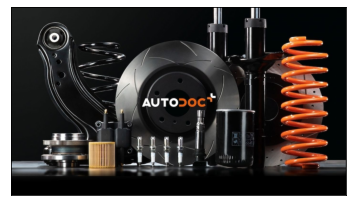

In [176]:
filename= 'autodoc.png' 
img = mpimg.imread(filename)
imgplot = plt.imshow(img)
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
plt.show()

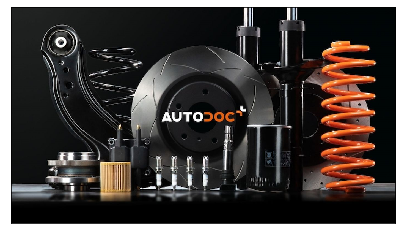

In [177]:
img = io.imread(filename)
io.imshow(img)
ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)
io.show()

6. Получите и интерпретируйте размеры картинки.

In [178]:
img.shape

(788, 1400, 4)

Разрешние 788 на 1400 пикселей 4 канала

7. Выведите верхнюю и левую половины изображения. 

8. Выведите произвольный прямоугольник изображения.

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

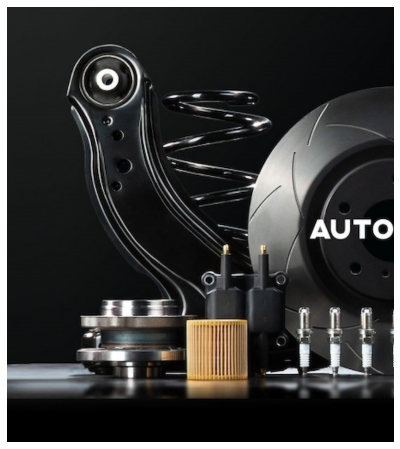

In [179]:
img = io.imread(filename)
x1 = 0
x2 = img.shape[0]
y1 = 0
y2 = int( img.shape[1] / 2)  
cropped_img = img[x1:x2,y1:y2]
image_show(cropped_img)

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

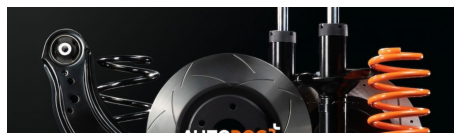

In [180]:
img = io.imread(filename)
x1 = 0
x2 = int( img.shape[0] / 2)
y1 = 0
y2 = img.shape[1]  
cropped_img = img[x1:x2,y1:y2]
image_show(cropped_img)

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

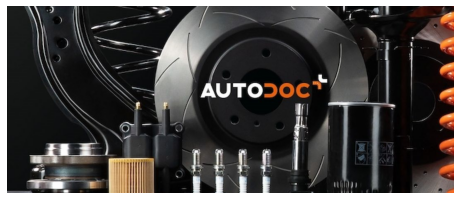

In [181]:
img = io.imread(filename)
x1 = np.random.randint(0, img.shape[0])
x2 = np.random.randint(x1, img.shape[0])
y1 = np.random.randint(0, img.shape[1])
y2 = np.random.randint(y1, img.shape[1])  
cropped_img = img[x1:x2,y1:y2]
image_show(cropped_img)

9. Выведите каждый канал изображения отдельно.

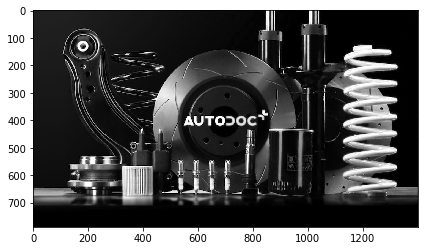

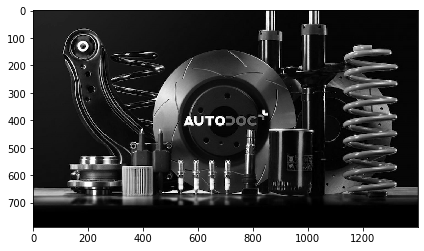

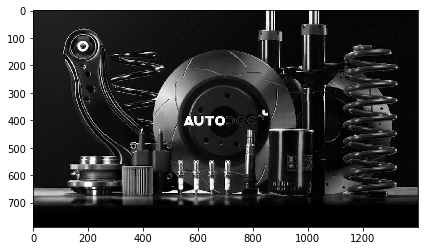

In [182]:
img = io.imread(filename)
for i in range(img.shape[2] -1):
    R = img[:, :, i]
    io.imshow(R)
    io.show()

10. Получите черно-белое изображение путем усреднения по каналам. *Сначала самостоятельно реализуйте усреднение, затем правильно воспользуйтесь функцией numpy.mean()* 
11. Получите негатив для черно-белого изображения.
12. Бинаризуйте черно-белое изображение по некоторому порогу.

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

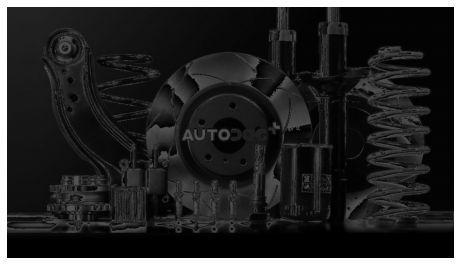

In [183]:
img = io.imread(filename)

r = img[:, :, 0]
g = img[:, :, 1]
b = img[:, :, 2]

summ_matrix = r + g + b

mean_r = summ_matrix * 1/3
mean_g = summ_matrix * 1/3
mean_b = summ_matrix * 1/3

img[:, :, 0] = mean_r
img[:, :, 1] = mean_g
img[:, :, 2] = mean_b
image_show(img)

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

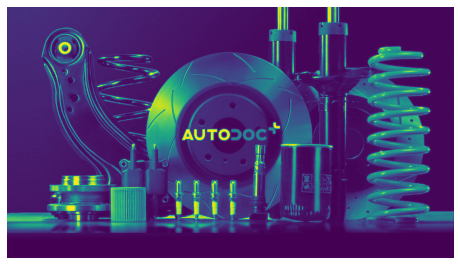

In [184]:
img = io.imread(filename)
img = np.mean(img, axis = 2)
image_show(img)

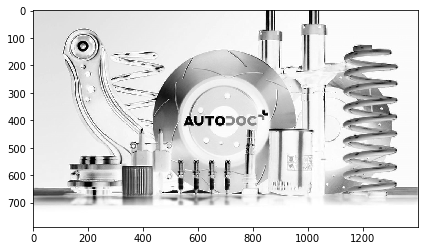

In [185]:
from skimage.color import rgba2rgb
from skimage.color import rgb2gray
from skimage import util
img_rgba = io.imread(filename)
img_rgb = rgba2rgb(img_rgba)
img = rgb2gray(img_rgb)
img_inverted = util.invert(img)
io.imshow(img_inverted)
io.show()

In [186]:
def image_threshold(img,threshold):
    result = img > threshold
    return(result)

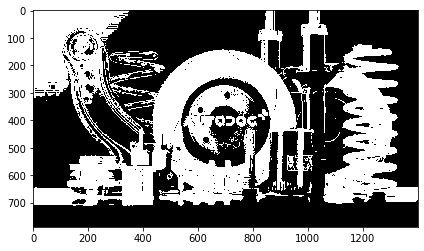

In [187]:
img_rgba = io.imread(filename)
img_rgb = rgba2rgb(img_rgba)
img = rgb2gray(img_rgb)
threshold = 0.1
img_thresh = image_threshold(img,threshold)
io.imshow(img_thresh)
io.show()

13. Уменьшите цветное изображение в 2 раза. *Используйте самый элементарный способ*.

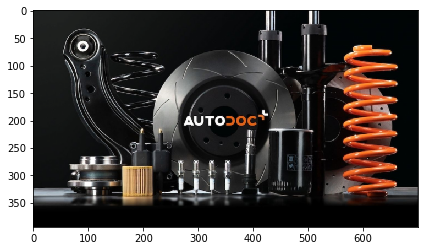

In [188]:
img = io.imread(filename)
img_resized = resize(img, (int(img.shape[0] / 2), int(img.shape[1] / 2)))   
io.imshow(img_resized)
io.show()

14. Отразите цветное изображение по любой из осей.
15. Поверните на 90 градусов и отразите цветное изображение за константное время.

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

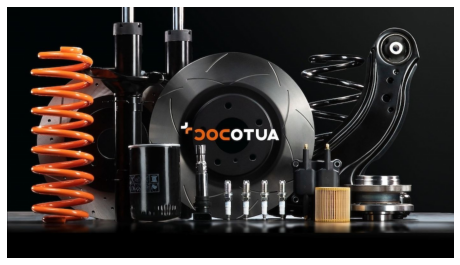

In [189]:
img = io.imread(filename)
img_fliped = fliplr(img)
image_show(img_fliped)

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

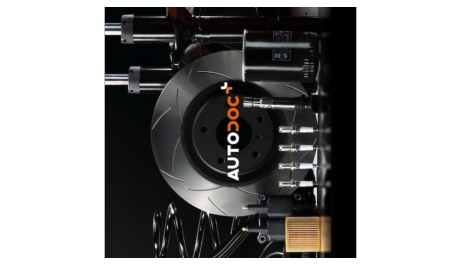

In [190]:
img = io.imread(filename)
img_rotated = rotate(img, angle=90)
image_show(img_rotated)

16. Преобразуйте картинку в матрицу, где строка - это пиксель изображения, а столбцы - это кординаты и значение RGB этого пикселя.

## Оформление
Изучите и строго следуйте [PEP 8 Style Guide for Python Code](https://www.python.org/dev/peps/pep-0008/). Используйте возможности jupyter notebook для оформления отчета. Оформление кода и задачи в целом также учитывается.